In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#load data set using pandas

dogs = pd.read_csv('dog-data.csv')

print(len(dogs))

59


In [2]:
#outputs the number of rows and columns showing that we have 59 dog breeds and 9 features in the dataset
print(dogs.shape)

(59, 9)


In [3]:
#print the first 5 rows of the dataset
dogs.head()

,dog_label,dog_size,dog_breed,height_inch,weight_lbs,obedience,lifespan_years,body_length_inch,neck_size_inch
0,1,small_dog,french_bulldog,10.5,18.0,30%,11,15.0,16.0
1,1,small_dog,french_bulldog,11.5,21.0,30%,12,15.5,16.5
2,1,small_dog,french_bulldog,12.0,25.8,30%,13,16.0,17.0
3,1,small_dog,french_bulldog,12.1,27.0,30%,14,17.0,15.5
4,1,small_dog,poodle,10.0,19.0,95%,12,12.0,18.0


In [4]:
#we have 3 dog size types
print(dogs['dog_size'].unique())

['small_dog' 'medium_dog' 'big_dog']


In [5]:
# create a mapping from dog label value to dog breed to make results easier to interpret
# mapping ordinal features: we convert categorical string values into integers
map_dog_breed = dict(zip(dogs.dog_label.unique(), dogs.dog_breed.unique()))
map_dog_breed

{1: 'french_bulldog', 2: 'poodle', 3: 'chihuahua'}

In [6]:
#output the dog breeds
print(dogs['dog_breed'].unique())

['french_bulldog' 'poodle' 'chihuahua' 'pomeranian' 'siberian_husky'
 'dalmatian' 'boxer' 'great_dane' 'saint_bernard' 'mastiff']


In [7]:
#print the number of each breed inside dog_size as small-medium-big dog
#we note that the data is more or less balanced

print(dogs.groupby('dog_size').size())

dog_size
big_dog       22
medium_dog    19
small_dog     18
dtype: int64


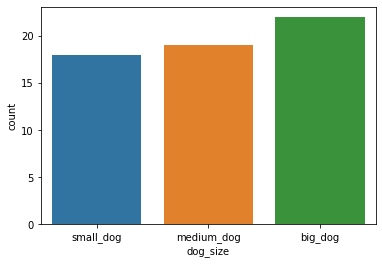

In [8]:
#seaborn is a library for statistical graphics producing informative plots
#visualize distribution of data to understand and explore it

import seaborn as sns
sns.countplot(dogs['dog_size'],label="Count")
plt.show()

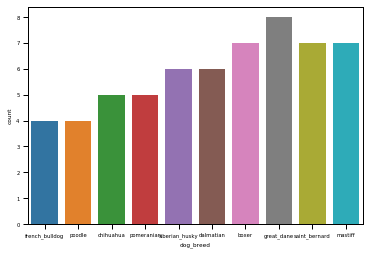

<Figure size 2160x1440 with 0 Axes>

In [55]:
#visualize an informative plot on distribution of dog breeds
sns.set_context("paper", font_scale=0.6,rc={"lines.linewidth": 0.5}) #set the plotting context parameters but to be modified since the dog breeds are not readable
sns.countplot(dogs['dog_breed'],label="Count")
plt.figure(figsize=(30,20))
plt.show()


In [14]:
#column 'obedience' contains numeric values, but is formatted as object.Therefore, we need to convert it to numeric value (float).
#string method used to strip the right trailing percent sign (%).
#astype() used to convert to type float.
#assign new values back to the dogs dataframe, column 'obedience'
dogs['obedience'] = dogs['obedience'].str.rstrip('%').astype('float')

In [15]:
#display first 5 rows of dataset to check if percent sign has been removed.
dogs.head()

,dog_label,dog_size,dog_breed,height_inch,weight_lbs,obedience,lifespan_years,body_length_inch,neck_size_inch
0,1,small_dog,french_bulldog,10.5,18.0,30.0,11,15.0,16.0
1,1,small_dog,french_bulldog,11.5,21.0,30.0,12,15.5,16.5
2,1,small_dog,french_bulldog,12.0,25.8,30.0,13,16.0,17.0
3,1,small_dog,french_bulldog,12.1,27.0,30.0,14,17.0,15.5
4,1,small_dog,poodle,10.0,19.0,95.0,12,12.0,18.0


In [16]:
#using pandas describe() method to get the statistical summary of all the attributes. 
#This analysis helps us to find which column is highly skewed, what are mean , median and quartile values of each column.
import seaborn as sns, numpy as np
dogs.describe().T

,count,mean,std,min,25%,50%,75%,max
dog_label,59.0,2.067797,0.827635,1.0,1.00,2.0,3.00,3.0
height_inch,59.0,21.323729,7.894768,6.0,12.80,22.7,27.95,32.9
weight_lbs,59.0,83.627119,66.781628,2.8,20.65,66.1,153.50,200.5
obedience,59.0,49.661017,21.732393,25.0,30.00,50.0,60.00,95.0
lifespan_years,59.0,11.406780,2.659522,6.0,10.00,11.0,13.00,20.0
body_length_inch,59.0,28.076271,13.726646,6.0,15.25,28.5,38.50,52.0
neck_size_inch,59.0,23.055932,6.790822,13.0,17.25,22.0,27.75,36.1


In [17]:
#specify the feature columns
feature_names = ['height_inch', 'weight_lbs', 'body_length_inch','neck_size_inch','lifespan_years', 'obedience']

In [18]:
#assign to X the feature columns and to y the label column from the dataset "dogs"
X = dogs[feature_names]
y = dogs['dog_label']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#apply scaling to the test set computed for the training set
#normalize data using the MinMaxScaler = largest value is assigned 1, smallest is assigned 0. The rest scaled accordingly to the extent of the dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(X_test)

#examine object shapes
print("The train data has: ", X_train.shape)
print("The test data has: ", X_test.shape)

[[1.         0.83156297 0.68888889 0.62770563 0.28571429 0.35714286]
 [0.78066914 0.84623166 0.82222222 0.86580087 0.14285714 0.07142857]
 [0.33457249 0.08598887 0.11111111 0.17316017 0.64285714 1.        ]
 [0.22304833 0.00657562 0.08888889 0.         0.5        0.85714286]
 [0.65799257 0.33990895 0.32222222 0.41125541 0.35714286 0.35714286]
 [0.81784387 0.95042994 0.84444444 0.88744589 0.21428571 0.07142857]
 [0.53159851 0.31158321 0.44444444 0.32467532 0.42857143 0.64285714]
 [0.96654275 0.62974203 0.64444444 0.56277056 0.14285714 0.35714286]
 [0.84758364 0.96256955 0.95555556 1.         0.28571429 0.        ]
 [0.5204461  0.18816388 0.51111111 0.36796537 0.42857143 0.35714286]
 [0.79182156 0.95042994 0.88888889 0.90909091 0.21428571 0.        ]
 [0.63197026 0.33586242 0.47777778 0.2987013  0.5        0.64285714]
 [0.2267658  0.01365706 0.11111111 0.08658009 0.57142857 0.85714286]
 [0.27881041 0.08851796 0.12222222 0.19480519 0.5        1.        ]
 [0.62825279 0.32979262 0.3       

In [21]:
#build model passing our training data sets which are X_train and y_train 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Logistic regression classifier accuracy on training set: ", logreg.score(X_train, y_train))
print("Logistic regression classifier accuracy on testing set: ", logreg.score(X_test, y_test))

Logistic regression classifier accuracy on training set:  0.9318181818181818
Logistic regression classifier accuracy on testing set:  0.7333333333333333


In [22]:
#pass X_train data to our model and see how it predicts to label all the independent training data: 
y_predict= logreg.predict(X_test)
print(y_predict)

[2 2 3 2 1 1 3 3 3 3 1 1 3 3 3]


In [31]:
# import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
#estimate accuracy of classifier
print('K-NN classifier accuracy on training set: ', knn.score(X_train, y_train)* 100.00)
print('K-NN classifier accuracy on test set:', knn.score(X_test, y_test)* 100.00)

K-NN classifier accuracy on training set:  100.0
K-NN classifier accuracy on test set: 100.0


In [27]:
# Use the trained k-NN classifier model to classify new, previously unseen objects
# first example: a small dog with height 10 inches, weight 6.0 lbs, body length of 9.0 inches, neck size in inches 18, lifespan in years equals 14 and obedience is 30% 

dog_breed_prediction = knn.predict([[8, 6.0, 9.0,18,14,30.0]])
map_dog_breed[dog_breed_prediction[0]]

'french_bulldog'

In [30]:
dog_breed_prediction = logreg.predict([[8, 6.0, 9.0,18,14,30.0]])
map_dog_breed[dog_breed_prediction[0]]

'poodle'